In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("noAirTemp_pd.csv")

data_visualize

,DAT,WL_Flume (m3/hour),WL_Flume_OUT (m3/hour),Solar (W/m2),Precipitation (mm),WindSpeed (m/s),RH (%),delta PD (mm)
0,164.791667,0.024406,0.156048,42,0.000,1.23,84.90,-0.1
1,164.833333,0.031719,0.136486,4,0.000,0.79,88.40,-0.1
2,164.875000,0.031719,0.136486,0,0.000,0.60,90.50,-0.1
3,164.916667,0.031719,0.060883,0,0.000,0.48,91.50,-0.1
4,164.958333,0.040201,0.049905,0,1.766,0.72,92.40,0.2
...,...,...,...,...,...,...,...,...
2442,267.250000,0.000000,0.000000,0,0.000,0.81,101.16,-0.1
2443,267.291667,0.000000,0.000000,12,0.000,0.76,101.20,0.0
2444,267.333333,0.000000,0.000000,82,0.017,0.88,101.22,0.0
2445,267.375000,0.000000,0.000000,195,0.000,0.76,101.22,0.0


In [3]:
data = np.loadtxt("noAirTemp_np.csv", delimiter = ',', dtype = np.float32)

X_COL = len(data_visualize.columns) - 1

x = data[:, :X_COL]
y = data[:, [-1]].ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [4]:
RandomForestRegModel = RandomForestRegressor(n_estimators = 1000, criterion = 'mse')
RandomForestRegModel.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [5]:
y_hat = RandomForestRegModel.predict(x_test)

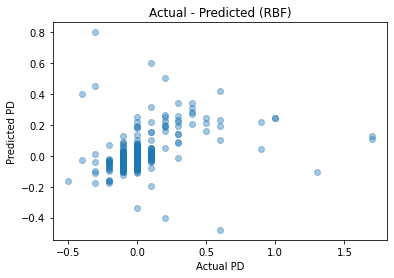

In [6]:
plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Actual - Predicted (RBF)')
plt.show()

In [7]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.17200144640667378
MAE: 0.08099346520477796
